In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM
from filterpy.kalman import KalmanFilter
from sklearn.metrics import mean_squared_error

In [ ]:
# Đặt seed để đảm bảo tái lập kết quả
np.random.seed(242)
n_samples = 980

# Sinh chuỗi thời gian tổng tích lũy (dạng Random Walk)
data = np.cumsum(np.random.randn(n_samples))

# Đưa vào DataFrame
df = pd.DataFrame(data, columns=["Value"])

In [ ]:
# Chuẩn hóa dữ liệu: đưa về dạng phân phối chuẩn (mean=0, std=1)
data_cleaned = (df - df.mean()) / df.std()

# Chuyển thành dạng numpy array
observations = data_cleaned.values

In [5]:
# Mô hình HMM để biểu diễn quá trình sinh chuỗi (High Resolution)
high_res_model = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)
high_res_model.fit(data_cleaned)

# Mô hình Low-Resolution có thể dùng nếu cần so sánh đa cấp (ở đây ta chỉ dùng 1 mô hình chính)
low_res_model = GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)
low_res_model.fit(data_cleaned)

GaussianHMM(covariance_type='full', n_components=2, n_iter=1000)

In [6]:
# Kalman Filter trạng thái 2 chiều, quan sát đầu ra 1 chiều
kf = KalmanFilter(dim_x=2, dim_z=1)

# Ma trận trạng thái và quan sát
kf.F = np.array([[1, 1], [0, 1]])  # Hệ thống tuyến tính: vị trí + vận tốc
kf.H = np.array([[1, 0]])          # Quan sát chỉ là vị trí

# Khởi tạo độ không chắc chắn
kf.P *= 1000  # Covariance lớn ban đầu
kf.R = 5      # Nhiễu đo
kf.Q = np.array([[0.001, 0], [0, 0.001]])  # Nhiễu hệ thống


In [7]:
predictions = []

for z in observations:
    # Ước lượng trạng thái ẩn bằng HMM
    high_res_state = high_res_model.predict([z])[0]

    # Cập nhật Kalman Filter
    kf.predict()
    kf.update(z)

    # Lưu dự đoán
    predictions.append(kf.x[0])


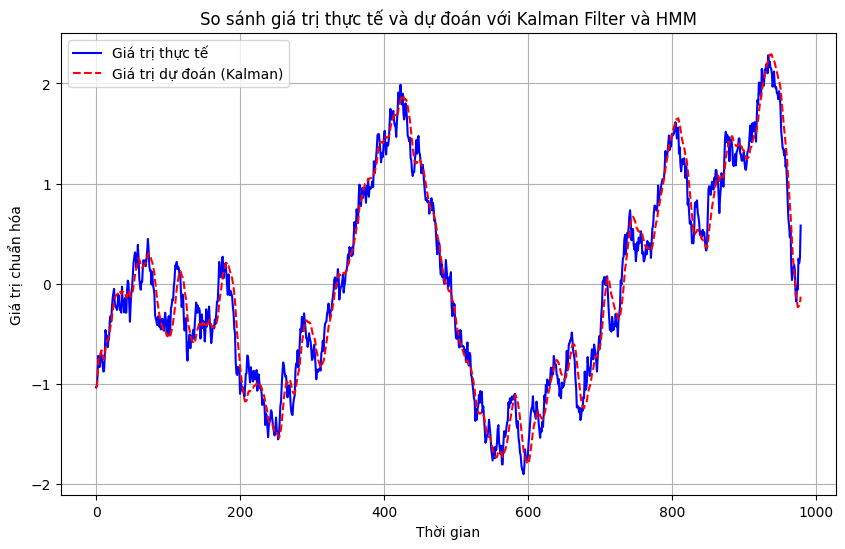

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(observations, label="Giá trị thực tế", color='blue')
plt.plot(predictions, label="Giá trị dự đoán (Kalman)", linestyle="--", color='red')
plt.legend()
plt.title('So sánh giá trị thực tế và dự đoán với Kalman Filter và HMM')
plt.xlabel("Thời gian")
plt.ylabel("Giá trị chuẩn hóa")
plt.grid(True)
plt.show()


In [10]:
mse = mean_squared_error(observations, predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 0.0293
